In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
import shap

from sklearn.model_selection import train_test_split 

In [2]:
train_df = pd.read_csv('./train_df.csv')
test_df = pd.read_csv('./test_df.csv')

columns_to_delete = ['Unnamed: 0']

# correlated data removal
columns_to_delete.append('gender_male') # correlated to gender_female
columns_to_delete += ['user_seller_actions', 'user_seller_cat', 'user_seller_brands'] # correlated to user_seller_interaction
columns_to_delete += ['user_cat_actions_y', 'user_brand_actions', 'user_item_actions'] # correlated to user_cat_actions_x

for v in columns_to_delete:
    train_df.drop(v, axis=1, inplace=True)
    test_df.drop(v, axis=1, inplace=True)

# temporary use of 200 values for training
Y = train_df['label']
X = train_df.drop('label', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1337, stratify = Y)

In [3]:
from sklearn.decomposition import PCA

pca = PCA(3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_pred = gnb.fit(X_train_pca, Y_train).predict(X_test_pca)


In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)


0.9190439475713185

In [6]:
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train_pca, Y_train)

parzen = KernelDensity()
parzen.fit(X_train_pca)



KernelDensity()

In [7]:
accuracy_score(Y_test, KNN.predict(X_test_pca))


0.9198149575944488

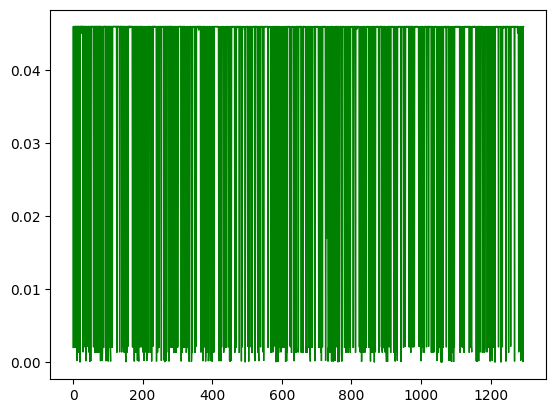

In [8]:
log_dens = parzen.score_samples(X_test_pca)

plt.fill(np.exp(log_dens), c='green')

In [9]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier()
clf.fit(X_train, Y_train)

accuracy_score(Y_test, clf.predict(X_test))


0.9228989976869699

In [10]:
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import euclidean, minkowski, chebyshev


In [13]:

cv = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": [3, 5, 7], "metric": ['l1', 'l2', 'cosine']})

cv.fit(X_train, Y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['l1', 'l2', 'cosine'],
                         'n_neighbors': [3, 5, 7]})

In [14]:
cv.best_params_

{'metric': 'l1', 'n_neighbors': 5}

In [15]:
est = cv.best_estimator_

accuracy_score(Y_test, est.predict(X_test))


0.9282960678488821